# Graphs
- non-linear data structure consisting of a finite set of vertices (nodes) and a set of edges which connect a pair of nodes
- used to represent networks (social networks, maps, etc.)

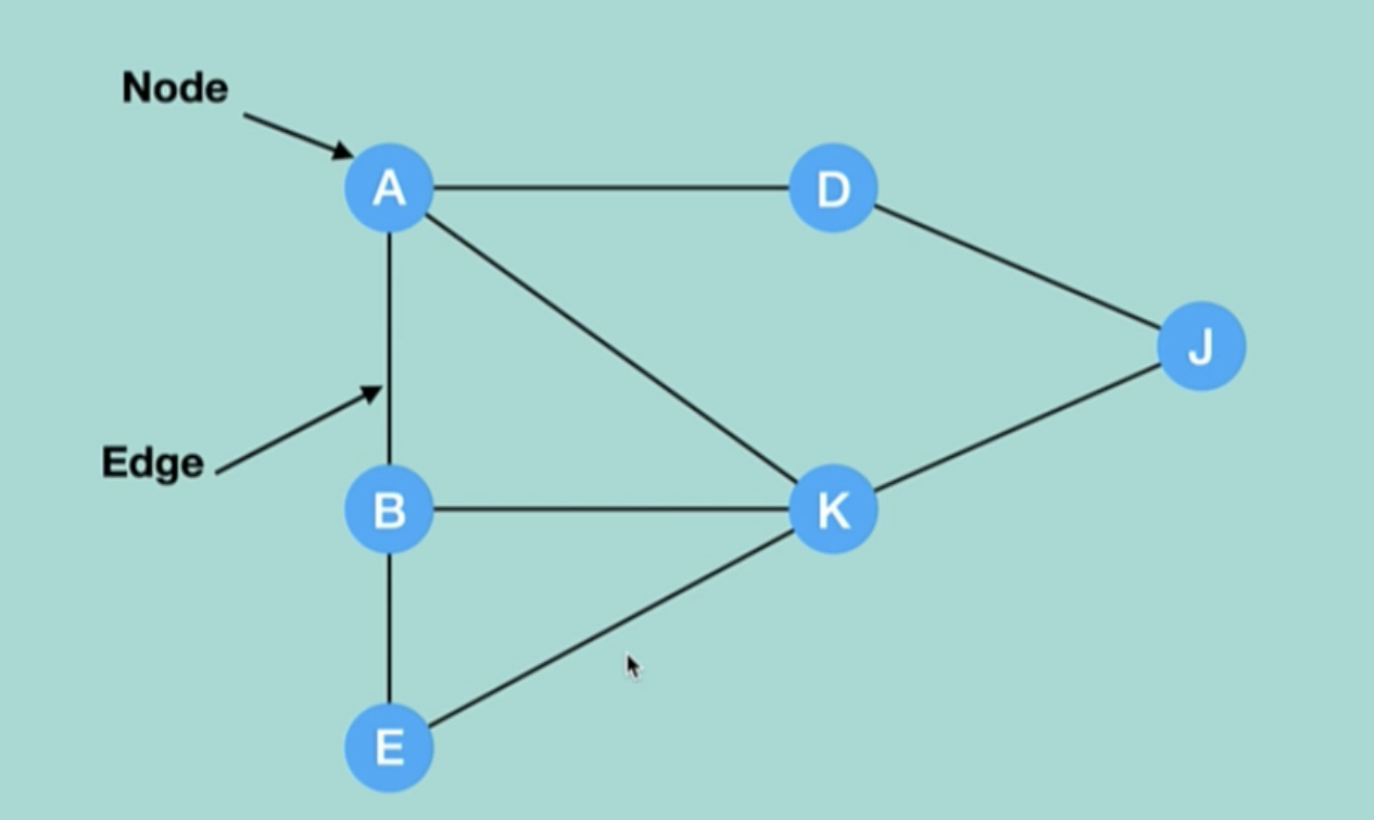

## Terminology
- vertices: nodes of a graph
- edge: connection between pair of vertices
- unweighted graph: a graph without a weight associated with any edge
- weighted graph: a graph which has a weight associated with any edge
- undirected graph: edges of the graph do not have an associated direction (edges are not arrows)
- directed graph: edges of the graph have an associated direction (edges are arrows)
- cyclic graph: graph which has at least one loop
- acyclic graph: graph with no loop
- tree: special case of directed acyclic graph

## Graph Types:
- Unweighted, undirected: edges have no weights and no directions
- unweighted, directed: edges have no weights but do have directions
- positive weighted undirected: edges have positive weights, and no direction
- positive weighted directed: edges have positive weights and directions
- negative weighted undirected graph: at least one edge has a negative weight and no direction
- negative weighted directed graph: at least one edge has a negative weight and directions
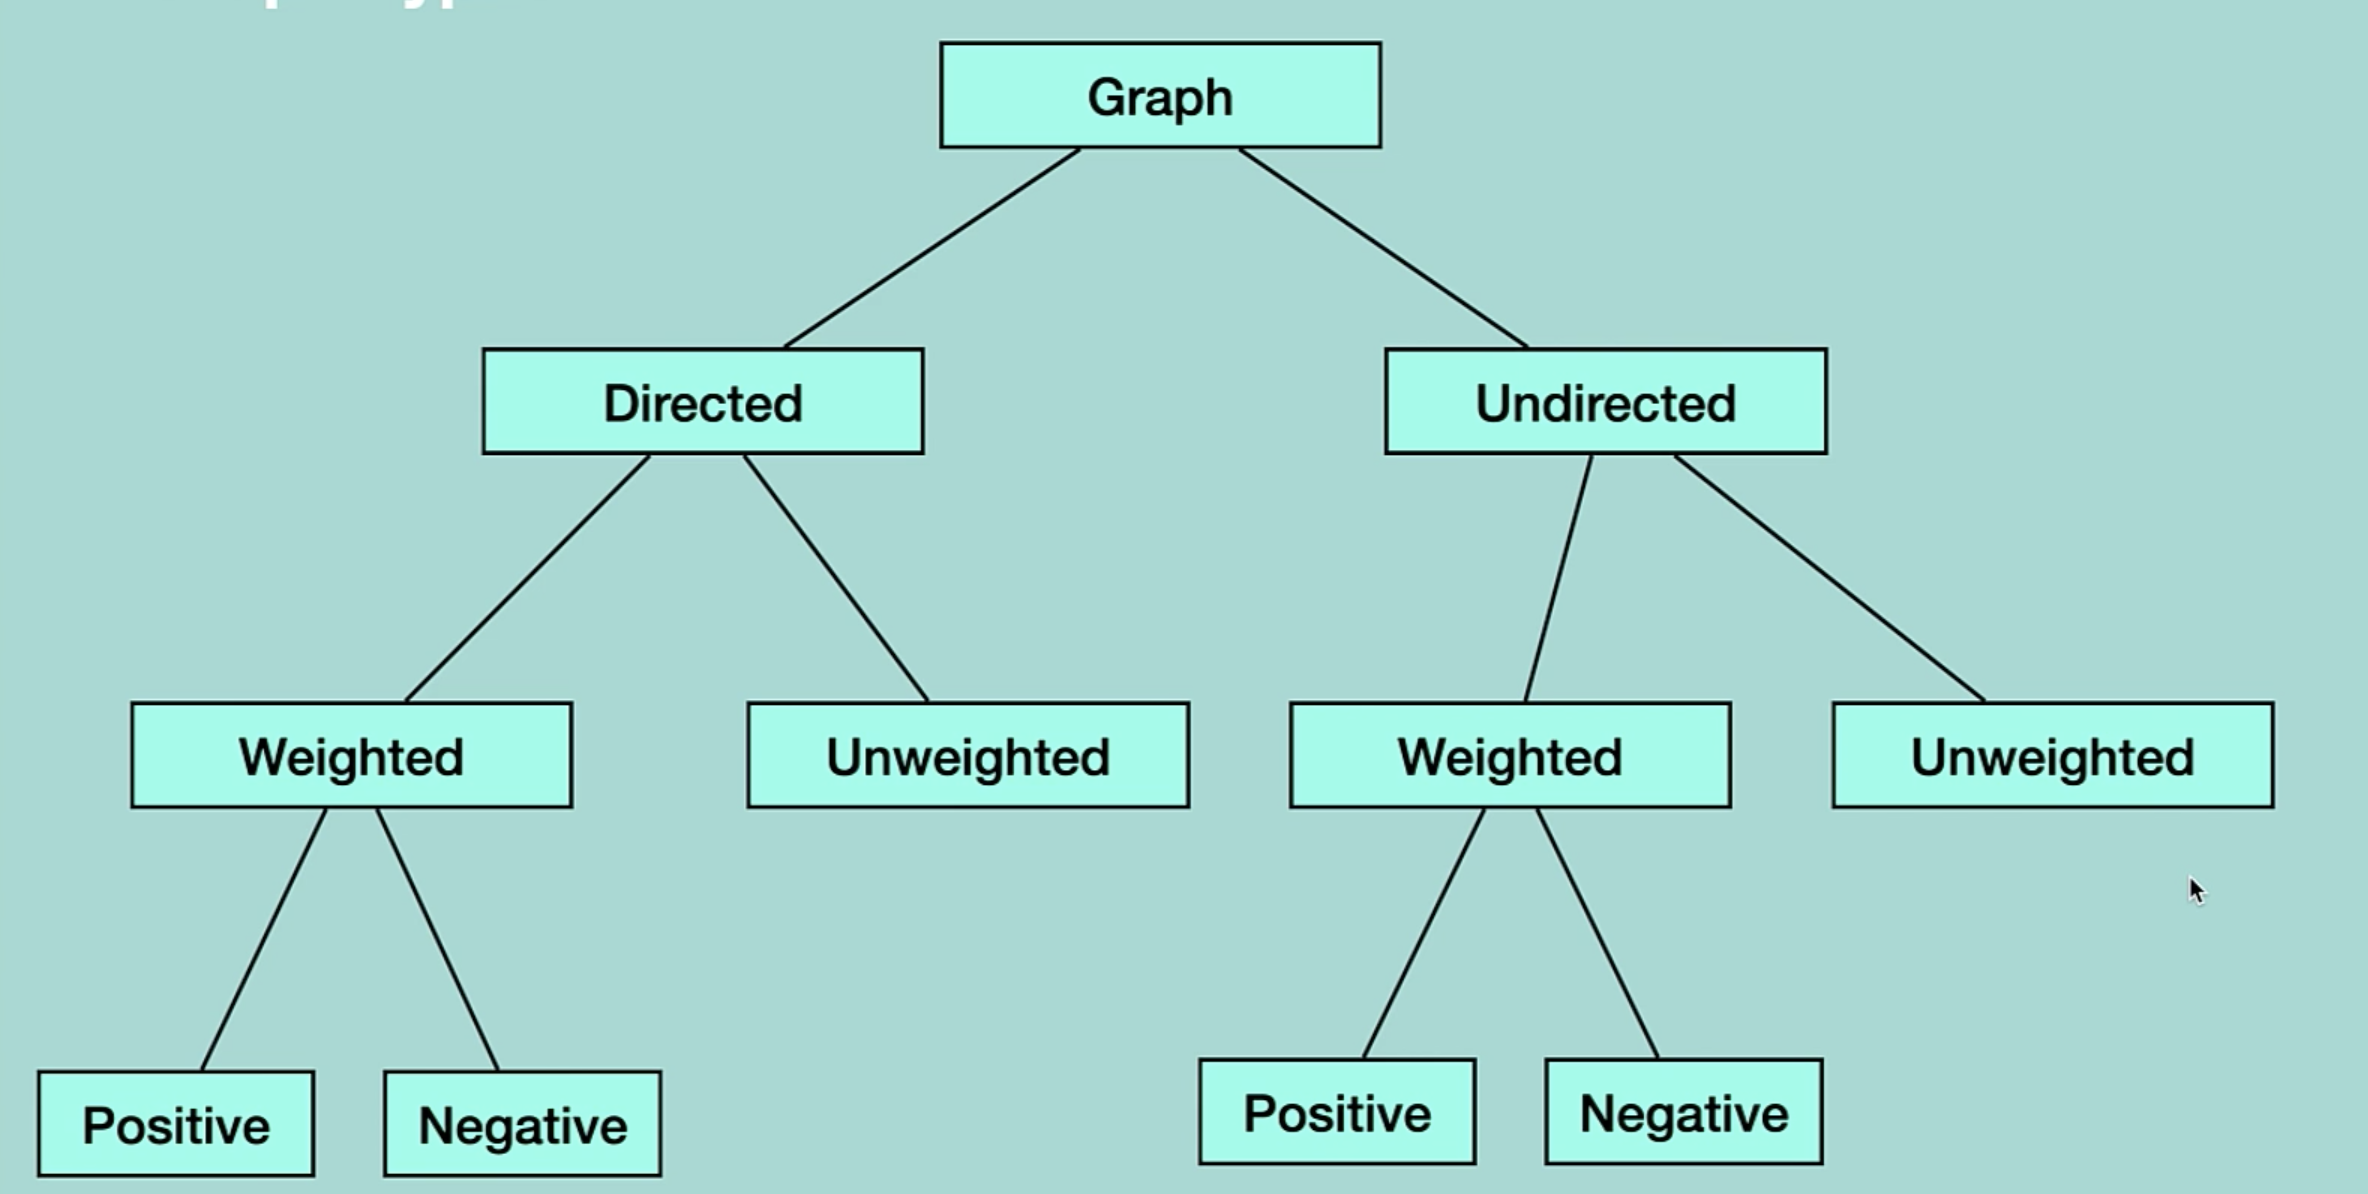

## Implementations
- adjacency matrix:
    - square matrix / 2d array with a side length of the number of nodes in the graph
    - elements in matrix indicate whether or not the vertices are adjacent or not

- adjacency list:
    - collection of unordered lists used to describe the graph
    - head of each list corresponds to a node in the graph, and all elements in each list are the adjacent nodes to the headcy
    
- use an adjacency matrix when the graph is complete or nearly, and use an adjacency list when there are fewer elements in the list

## Adjacency List Using collections.defaultdict

In [47]:
from collections import defaultdict, deque

In [48]:
class Graph:
    def __init__(self, num_vertices):
        self.graph = defaultdict(list)
        self.num_vertices = num_vertices
    
    def add_edge(self, vertex, edge):
        self.graph[vertex].append(edge)
        
    def topological_sort_r(self, v, visited, stack):
        visited.append(v)
        for i in self.graph[v]:
            if i not in visited:
                self.topological_sort_r(i, visited, stack)
        
        stack.appendleft(v)
    
    def topo_sort(self):
        visited = []
        stack = deque()
        for k in list(self.graph):
            if k not in visited:
                self.topological_sort_r(k, visited, stack)
        
        return stack

In [54]:
gg = Graph(8)
gg.add_edge('a', 'c')
gg.add_edge('c', 'e')
gg.add_edge('e', 'h')
gg.add_edge('e', 'f')
gg.add_edge('f', 'g')
gg.add_edge('b', 'd')
gg.add_edge('b', 'c')
gg.add_edge('d', 'f')

print(gg.graph)

defaultdict(<class 'list'>, {'a': ['c'], 'c': ['e'], 'e': ['h', 'f'], 'f': ['g'], 'b': ['d', 'c'], 'd': ['f']})


## Adjacency List Implementation using Dictionary

In [12]:
from collections import deque

In [35]:
class graph:
    def __init__(self, graph_dict=None):
        if graph_dict is None:
            self.graph_dict = {}
        else:
            self.graph_dict = graph_dict
    
    def add_edge(self, vertex, edge):
        self.graph_dict[vertex].append(edge)
    
    def add_edges(self, vertex, edges):
        for i in edges:
            self.add_edge(vertex, i)
        
    def add_vertex(self, name):
        self.graph_dict[name] = []
        
    def breadth_first_search(self, start):
        visited = []
        q = deque()
        q.appendleft(start)
        while len(q) > 0:
            curr = q.pop()
            if curr not in visited:
                visited.append(curr)
                for i in self.graph_dict[curr]:
                    if i not in visited:
                        q.appendleft(i)
        return visited

    def depth_first_search(self, start):
        visited = []
        stack = deque()
        stack.append(start)
        while len(stack) > 0:
            curr = stack.pop()
            if curr not in visited:
                visited.append(curr)
                for i in self.graph_dict[curr]:
                    if i not in visited:
                        stack.append(i)
        return visited
        

In [52]:
my_graph = graph({
    'a': ['b', 'c'],
    'b': ['a', 'd', 'g'],
    'c': ['a', 'd', 'e'],
    'd': ['c', 'f', 'b'],
    'g': ['b', 'f'],
    'e': ['c', 'f'],
    'f': ['e', 'g', 'd']
#     'a': ['b', 'c'],
#     'b': ['a', 'd', 'e'],
#     'c': ['a', 'e'],
#     'd': ['b', 'e', 'f'],
#     'e': ['d', 'f', 'c'],
#     'f': ['d', 'e']
})
print(my_graph.graph_dict)

{'a': ['b', 'c'], 'b': ['a', 'd', 'g'], 'c': ['a', 'd', 'e'], 'd': ['c', 'f', 'b'], 'g': ['b', 'f'], 'e': ['c', 'f'], 'f': ['e', 'g', 'd']}


## Single Source Shortest Path
- find the minimum distance from a source node to a destination node
- solution:
    - breadth first search --> unweighted graphs
    - dijkstra's algorithm --> weighted graphs or unweighted graphs
    - bellman ford algorithm --> all types of graphs including those with negative cycles
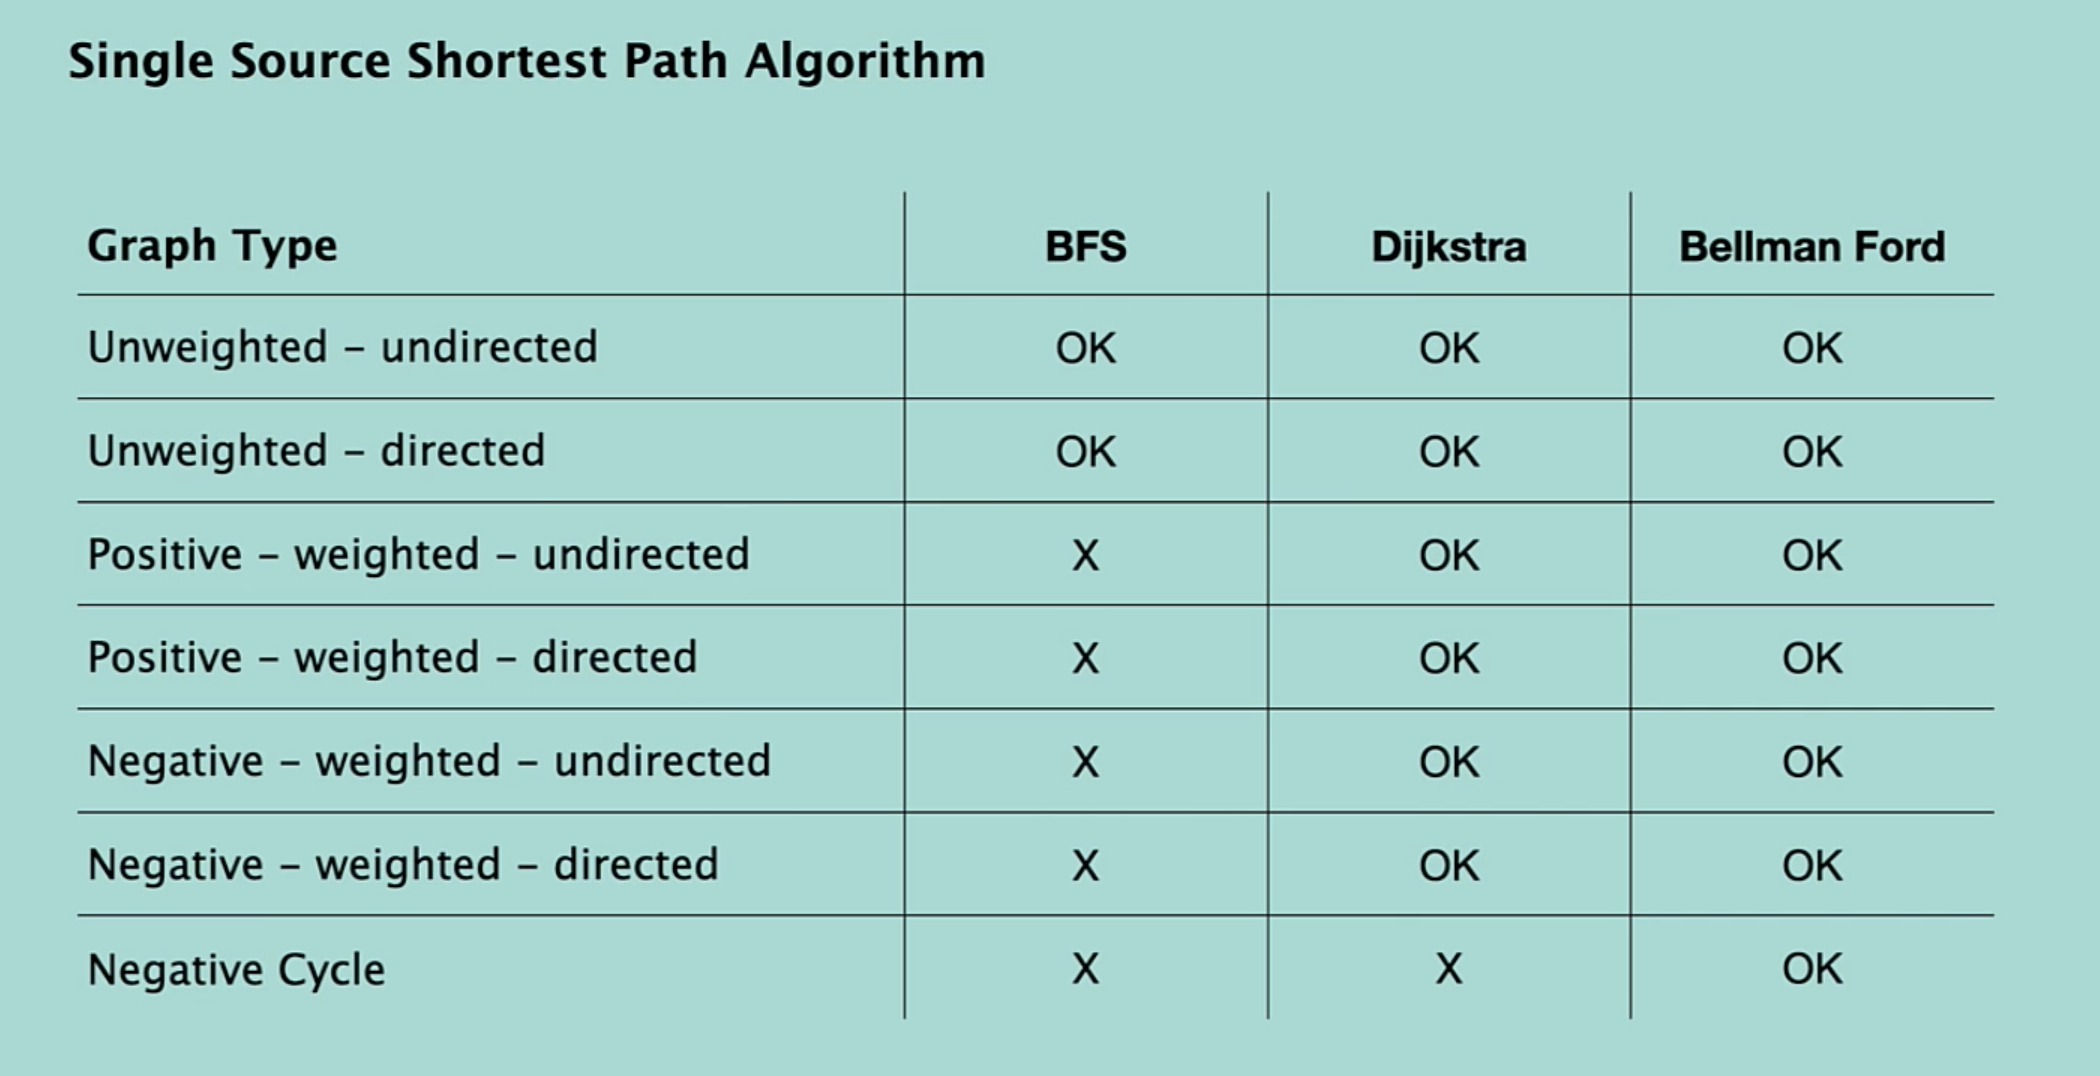

## All Pairs Shortest Path
- find a path between a source and destination that visits all vertices such that the total distance is minimum
- big picture:
    - run single source shortest path algorithm for each vertex in the graph
- solutions:
    - floyd-warshall algorithm